# Today is a milestone. You have learned the ingredients:

**Day 36: Lags (Using yesterday to predict today).**

**Day 39: Differencing (Making the data stationary).**

**Day 37: Moving Averages (Smoothing out the noise).**

Today, we combine them into the Gold Standard of statistical forecasting: ARIMA (AutoRegressive Integrated Moving Average).

# ***`Understand the 3 components of ARIMA (p, d, q) and build your first official Forecasting Model using statsmodels. Key Skill: The (p, d, q) Order.`***

# *ARIMA is a robot with three different brains working together.*

When you configure it, you have to tell it 3 numbers: order=(p, d, q).

**AR (AutoRegressive) p:"I look at the Past.**

"If p=1, I use Yesterday's price to guess Today.

If p=2, I use Yesterday and the Day Before.(This is what we did on Day 36).


**I (Integrated)  d:"I look at the Difference.**

"I subtract yesterday from today to make the data Stationary (flat).

If d=1, I subtract once.(This is what we did on Day 39).

**MA (Moving Average)  q:"I look at the Mistakes.**

"I look at my previous errors and smooth them out.If q=1,

I use yesterday's error to fix today's guess. (This is what we did on Day 37).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
#create a data

dates = pd.date_range(start= '2024-01-01' , periods = 100 , freq='D')
np.random.seed(42)
data = np.linspace(10,50,100) + np.random.normal(0,1,100)

df = pd.DataFrame({'Date':dates , 'Price':data})
df.set_index('Date', inplace = True)

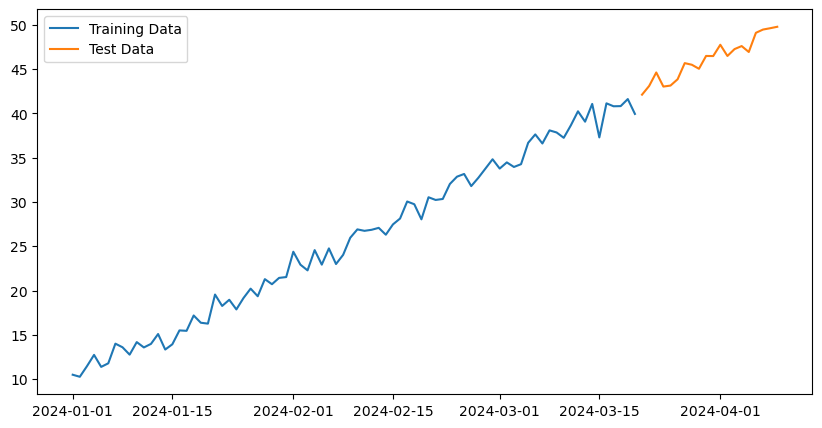

In [18]:
# 2. Split (Train vs Test)
# Important: In Time Series, we CANNOT shuffle. We must cut the tail off

train = df.iloc[:80] # 1 to 80th day
test = df.iloc[80:] # 80 to 100th day

plt.figure(figsize=(10,5))
plt.plot(train, label = 'Training Data')
plt.plot(test , label= 'Test Data')
plt.legend()
plt.show()

# 2: Train the ARIMA Model

We need to pick (p, d, q).

Let's guess: (1, 1, 1).

p=1: Use 1 day of history.

d=1: Subtract once to kill the trend (since our data goes up).

q=1: Fix errors using 1 day of error history.

In [19]:
# 3. Create & Fit Model
# order=(p, d, q)

model= ARIMA(train['Price'], order=(1,1,1))
model_fit = model.fit()

#check the summmary (complex but good info)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.299
Date:                Sun, 04 Jan 2026   AIC                            270.598
Time:                        21:05:09   BIC                            277.706
Sample:                    01-01-2024   HQIC                           273.446
                         - 03-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2735      0.328     -0.835      0.404      -0.916       0.368
ma.L1         -0.1405      0.360     -0.391      0.696      -0.845       0.564
sigma2         1.6641      0.287      5.792      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# 3: Forecast


In [22]:
# forecast
# we ask for 20 days to match the length of our test set

forecast_result = model_fit.get_forecast(steps = 20)
forecast_values = forecast_result.predicted_mean

# get confidence intervals

conf_int = forecast_result.conf_int()


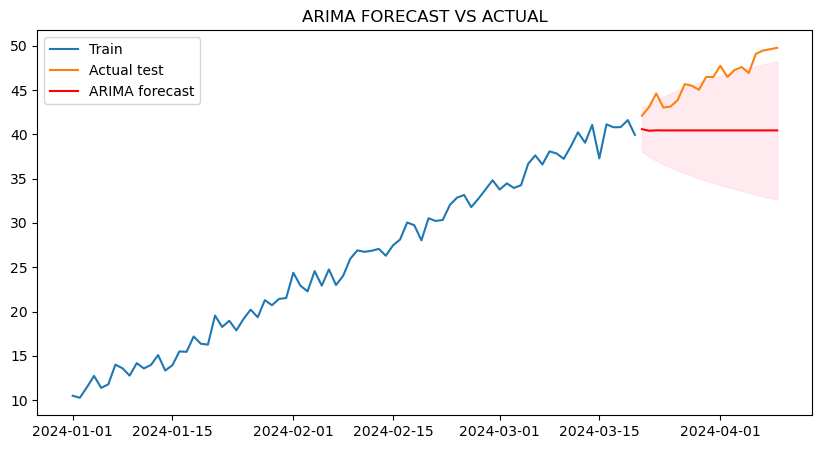

In [23]:
#visualise

plt.figure(figsize=(10,5))
plt.plot(train.index , train['Price'], label = 'Train')
plt.plot(test.index , test['Price'] , label = 'Actual test')
plt.plot(test.index , forecast_values, label = 'ARIMA forecast' , color = 'red')


# Draw the Confidence Interval (The Shaded Area)

plt.fill_between(test.index , conf_int.iloc[:, 0], conf_int.iloc[:, 1], color = 'pink', alpha = 0.3)

plt.title('ARIMA FORECAST VS ACTUAL')
plt.legend()
plt.show()

**Look at the Red Line (Forecast)**

Does it follow the trend? **Yes.**

Because we set d=1, ARIMA knew to "difference" the data, find the trend, and then add it back.

**Look at the Pink Zone (Confidence Interval).**

It gets wider the further out you go.

This is the model saying: "I'm pretty sure about tomorrow, but I'm very unsure about 20 days from now."

**The Tuning Problem:**

We guessed (1, 1, 1).

What if (2, 1, 2) was better?

In the real world, we use a tool called **AutoARIMA (like Grid Search)** to find these numbers for us.